In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Activation

In [2]:
tf.__version__

'2.4.0'

In [3]:
tf.test.is_gpu_available()
#tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
my_devices = tf.config.experimental.list_physical_devices(device_type='CPU')
tf.config.experimental.set_visible_devices(devices= my_devices, device_type='CPU')

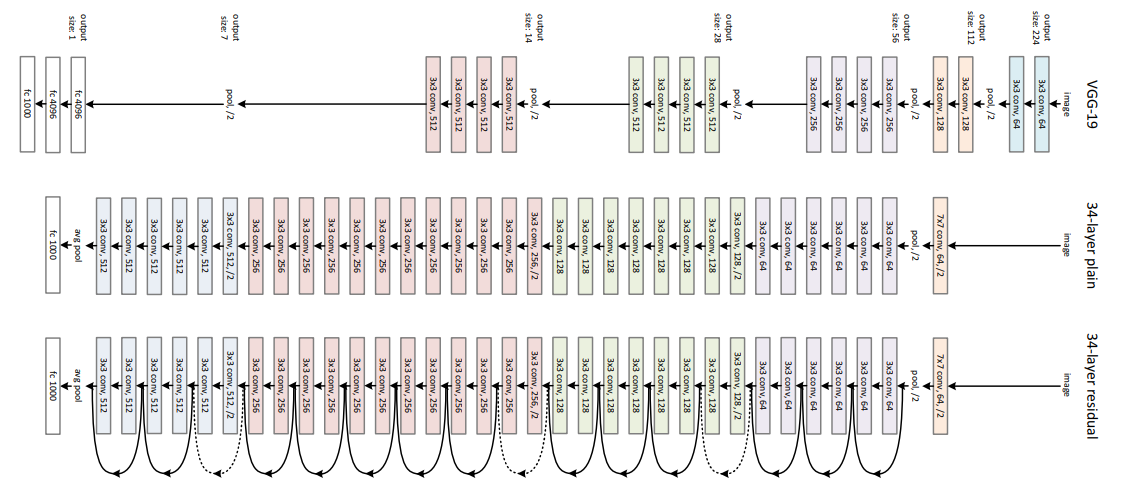

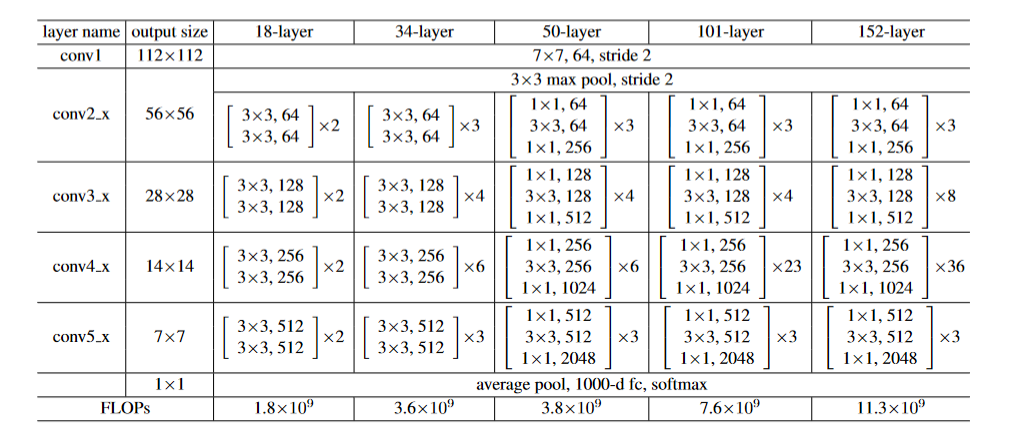

In [ ]:
def idendity(x, filters, training=True, stride=1):
    
    if tiny:
        filters = filters//16
    
    xskip = x
    
    x = layers.Conv2D(filters,kernel_size = 1,strides =1, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
    x = Activation(tf.nn.relu)(x)
    
    x = layers.Conv2D(filters,kernel_size = 3,strides =1, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
    x = Activation(tf.nn.relu)(x)
    
    x = layers.Conv2D(filters*4,kernel_size = 1,strides =1, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
       
    x = tf.nn.relu(tf.keras.layers.add([xskip, x]))
    
    return x


def conv(x, filters, training=True, stride=1):
    
    if tiny:
        filters = filters//16
    
    
    xskip = layers.Conv2D(filters*4,kernel_size = 1,strides =stride, padding = 'valid')(x)
    xskip = layers.BatchNormalization()(xskip)
    
    x = layers.Conv2D(filters,kernel_size = 1,strides =stride, padding = 'valid')(x)
    x = layers.BatchNormalization()(x)
    x = Activation(tf.nn.relu)(x)
    
    x = layers.Conv2D(filters,kernel_size = 3,strides =1, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
    x = Activation(tf.nn.relu)(x)
    
    x = layers.Conv2D(filters*4,kernel_size = 1,strides =1, padding = 'same')(x)
    x = layers.BatchNormalization()(x)
       
    x = tf.nn.relu(tf.keras.layers.add([xskip, x]))
    
    return x

def ResNet(Num_class, input_shape=(224,224,3), LayerList=[3,4,6,3] ,training=True):
    
    
    X_in = layers.Input(input_shape)
    
    X = layers.Conv2D(filters=64, kernel_size= 7, strides=2, padding="same")(X_in)
    X = layers.BatchNormalization()(X)
    X = layers.Activation(tf.nn.relu)(X)
        
    X = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="same")(X)
    
    X = conv(X,64,training=True, stride=1)
    X = idendity(X,64)
    if not tiny:
        X = idendity(X,64)
        
    
    X = conv(X,128,training=True, stride=2)
    if not tiny:
        X = idendity(X,128)
        X = idendity(X,128)
        X = idendity(X,128)
        
    
    X = conv(X,256,training=True, stride=2)
    if not tiny:
        X = idendity(X,256)
        X = idendity(X,256)
        X = idendity(X,256)
        X = idendity(X,256)
        X = idendity(X,256)
        
    
    X = conv(X,512,training=True, stride=2)
    if not tiny:
        X = idendity(X,512)
        X = idendity(X,512)
        X = idendity(X,512)
    
    
    X = layers.AveragePooling2D((2, 2), padding='same')(X)

    X = layers.Flatten()(X)
    output = layers.Dense(Num_class, activation='sigmoid', kernel_initializer='he_normal')(X) #multi-class 

    model = tf.keras.Model(inputs=X_in, outputs=output, name='Resnet50')
    
    
    return model      

In [14]:
num_class = 2
tiny = True
final_activation = 'sigmoid'

model = ResNet(1)
model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 112, 112, 64) 256         conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 112, 112, 64) 0           batch_normalization_20[0][0]     
___________________________________________________________________________________________

In [15]:
model.save('ResNet_tiny.h5')

In [16]:
import os

base_dir = 'img'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [17]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [18]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [19]:
import matplotlib.pyplot as plt
from matplotlib import image
import random

nrows = 4
ncols = 4

number_image_to_take = 4
cat_images = [os.path.join(train_cats_dir, file_name)
                for file_name in random.sample(os.listdir(train_cats_dir), number_image_to_take)]

dog_images = [os.path.join(train_dogs_dir, file_name)
                for file_name in random.sample(os.listdir(train_dogs_dir), number_image_to_take)]

print('cats:', cat_images)
print('dogs:', dog_images)
images = cat_images + dog_images

cats: ['img\\train\\cats\\cat.654.jpg', 'img\\train\\cats\\cat.313.jpg', 'img\\train\\cats\\cat.809.jpg', 'img\\train\\cats\\cat.785.jpg']
dogs: ['img\\train\\dogs\\dog.382.jpg', 'img\\train\\dogs\\dog.586.jpg', 'img\\train\\dogs\\dog.784.jpg', 'img\\train\\dogs\\dog.385.jpg']


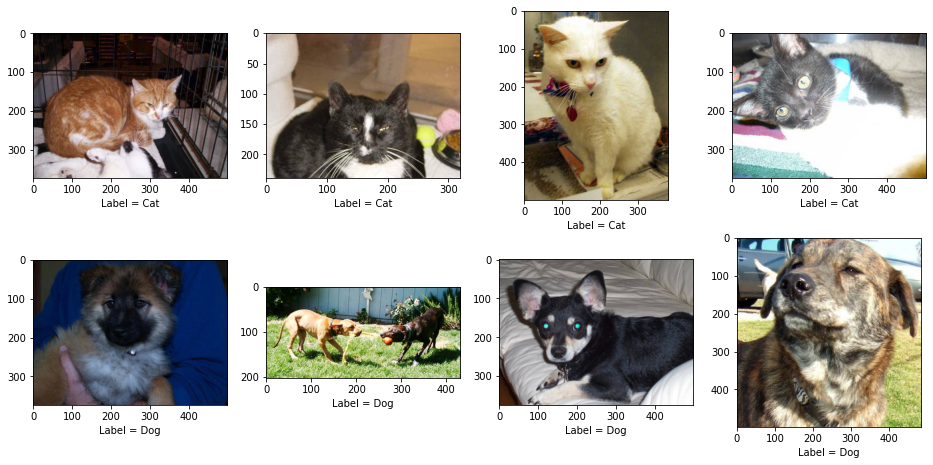

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(images):
    plt.subplot(nrows, ncols, i+1)
    img = image.imread(img_path)
    plt.imshow(img)
    if i < number_image_to_take:
        plt.xlabel('Label = Cat')
    else:
        plt.xlabel('Label = Dog')

plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,               # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator) 

Epoch 1/15
63/63 [==============================] - 81s 1s/step - loss: 0.6632 - accuracy: 0.6240 - val_loss: 0.7388 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 75s 1s/step - loss: 0.6309 - accuracy: 0.6640 - val_loss: 0.8060 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 89s 1s/step - loss: 0.6188 - accuracy: 0.6670 - val_loss: 0.9114 - val_accuracy: 0.5010
Epoch 4/15
63/63 [==============================] - 76s 1s/step - loss: 0.6136 - accuracy: 0.6625 - val_loss: 0.7342 - val_accuracy: 0.5400
Epoch 5/15
63/63 [==============================] - 78s 1s/step - loss: 0.5761 - accuracy: 0.6945 - val_loss: 0.7643 - val_accuracy: 0.5980
Epoch 6/15
63/63 [==============================] - 57s 894ms/step - loss: 0.5666 - accuracy: 0.7015 - val_loss: 0.7239 - val_accuracy: 0.6220
Epoch 7/15
63/63 [==============================] - 81s 1s/step - loss: 0.5575 - accuracy: 0.7195 - val_loss: 0.6727 - val_accuracy: 0.6330
Epoch 8/15
63/63 

In [26]:
model.save('cats-dogs.v0.1.h5')

In [ ]:
import glob
f1 = glob.glob(r'img\train\cats\*.jpg')
f2 = glob.glob(r'img\train\dogs\*.jpg')

from PIL import Image
import numpy as np

x = []
y = []


for i in f1:
    im = np.array(Image.open(i))
    x.append(img/255)
    y.append(0)  # 0 for cat

for i in f2:
    im = np.array(Image.open(i))
    x.append(img/255)
    y.append(1)  # 1 for dog

In [ ]:
f1 = glob.glob(r'img\validation\cats\*.jpg')
f2 = glob.glob(r'img\validation\dogs\*.jpg')

from PIL import Image
import numpy as np

xv = []
yv = []


for i in f1:
    im = np.array(Image.open(i))
    xv.append(img/255)
    yv.append(0)  # 0 for cat
    
for i in f2:
    im = np.array(Image.open(i))
    xv.append(img/255)
    yv.append(1)  # 1 for dog